In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import emcee
import pandas as pd
from tqdm import tqdm

In [2]:
from glcat_lightcurve_utils import counts2mag
from glcat_photometry_utils import *

In [3]:
ncat = pd.read_csv('ncat_240616.csv',index_col=None)

In [4]:
aperture_radii = np.array([1.5, 2.3, 3.8, 6.0, 9.0, 12.8, 17.3])
#i = 2078 # this one has missing data so it's good for error checking
#i = 1000 # this is just a normal source
i = 1010
#i = 2518 # cps >26
#i = 770 # cps >46
flux = np.array([ncat[f'NUV_CPS_APER{a}'].iloc[i] for a,r in enumerate(aperture_radii)])
flux_err = np.array([ncat[f'NUV_CPS_ERR_APER{a}'].iloc[i] for a,r in enumerate(aperture_radii)])
ix = np.where(np.isfinite(flux))
print(flux,flux_err,ix)

[0.05836441 0.12096332 0.2627261  0.43092083 0.64594733 1.00471073
 1.68252789] [0.00623728 0.00897942 0.01323344 0.01694806 0.02075008 0.02587866
 0.03348902] (array([0, 1, 2, 3, 4, 5, 6]),)


In [5]:
%time flat_samples = mcmc_aperture_curve(aperture_radii,flux,flux_err)

CPU times: user 701 ms, sys: 3.98 ms, total: 705 ms
Wall time: 705 ms


Best-fit parameters:
cps: 0.270 +0.023 -0.018
sigma: 2.429 +0.150 -0.153
bg_cps: 0.001 +0.000 -0.000


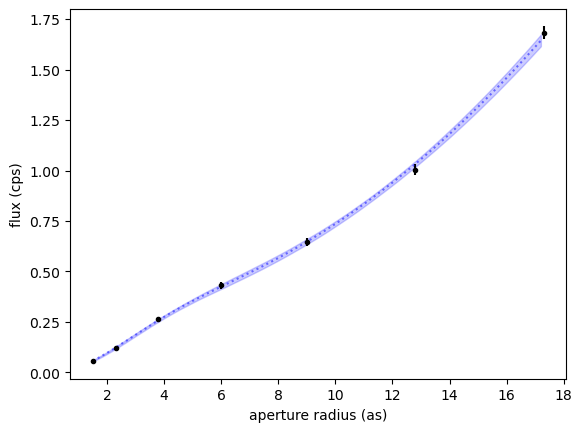

In [10]:
stats = get_percentile_ranges(flat_samples)
plot_mcmc_results(flat_samples,aperture_radii,flux,flux_err)

In [7]:
gaussian_flux_fraction(aperture_radii,stats['sigma'][0])

array([0.17338453, 0.36089619, 0.70537308, 0.95248218, 0.99894579,
       0.99999905, 1.        ])

In [8]:
stats['cps'][0]*gaussian_flux_fraction(aperture_radii,stats['sigma'][0])

array([0.04749677, 0.09886351, 0.19322913, 0.26092193, 0.27365011,
       0.27393864, 0.2739389 ])

In [9]:
stats['bg_cps'][0]

0.001470542593379107

In [10]:
np.array([ncat.iloc[i][f'NUV_CPS_APER{j}'] for j in range(7)])

array([0.05836441, 0.12096332, 0.2627261 , 0.43092083, 0.64594733,
       1.00471073, 1.68252789])

In [11]:
np.array([ncat.iloc[i][f'NUV_CPS_APER{j}'] for j in range(7)])-stats['bg_cps'][0]*np.pi*np.array(aperture_radii)**2

array([0.04796975, 0.09652434, 0.19601553, 0.26460639, 0.27173982,
       0.24779519, 0.29985424])

In [12]:
np.pi*np.array(aperture_radii)**2

array([  7.06858347,  16.61902514,  45.36459792, 113.09733553,
       254.46900494, 514.71854036, 940.24726529])

In [13]:
(ncat.iloc[i][f'NUV_CPS_APER6']-ncat.iloc[i][f'NUV_CPS_APER5'])/(np.pi*(aperture_radii[-1]-aperture_radii[-2])**2)

0.010654612615943382

Text(0, 0.5, 'bgsub cps')

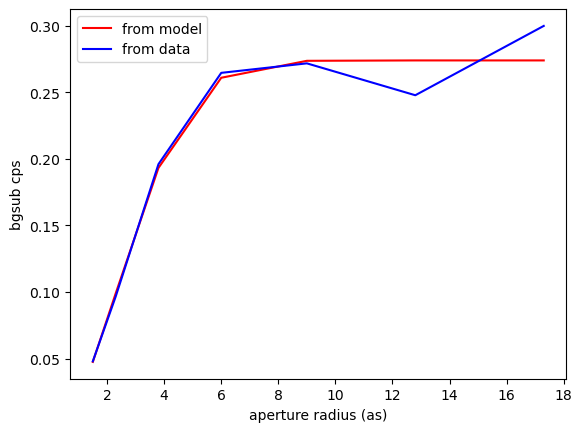

In [14]:
plt.plot(aperture_radii,stats['cps'][0]*gaussian_flux_fraction(aperture_radii,stats['sigma'][0]),'r-',label='from model')
plt.plot(aperture_radii,
         np.array([ncat.iloc[i][f'NUV_CPS_APER{j}'] for j in range(7)])-stats['bg_cps'][0]*np.pi*np.array(aperture_radii)**2,
         'b-',label='from data')
plt.legend()
plt.xlabel('aperture radius (as)')
plt.ylabel('bgsub cps')

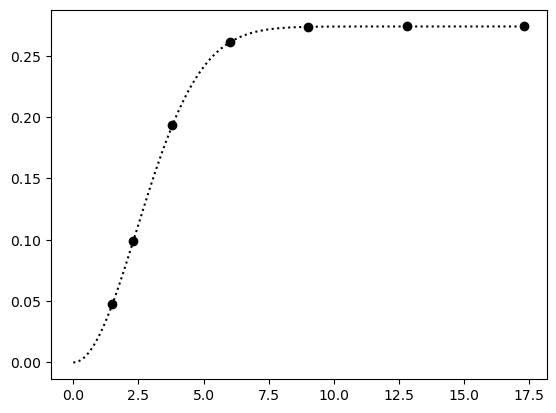

In [22]:
r = np.arange(0,17.3,0.1)
plt.plot(r,stats['cps'][0]*gaussian_flux_fraction(r,stats['sigma'][0]),'k:',label='from model')
plt.plot(aperture_radii,stats['cps'][0]*gaussian_flux_fraction(aperture_radii,stats['sigma'][0]),'ko',label='from model')
#plt.gca().invert_yaxis()

TypeError: Image data of dtype object cannot be converted to float

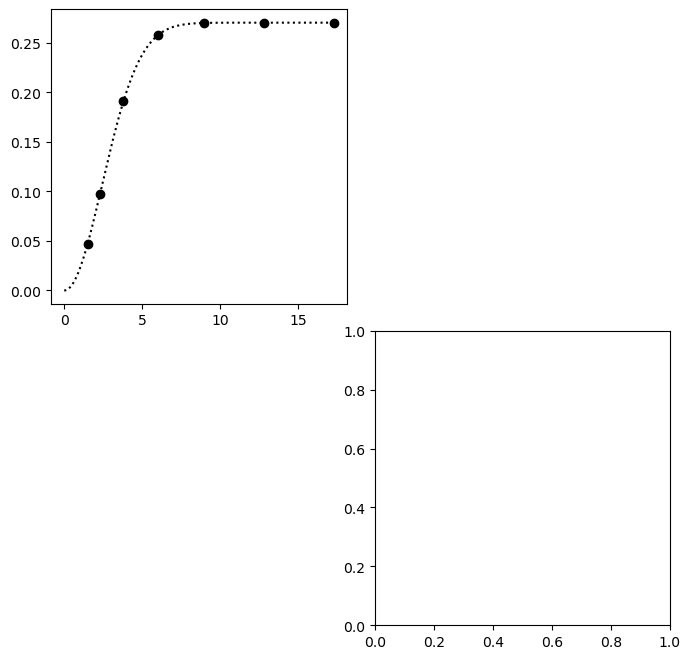

In [15]:
# Create a figure and a gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4)  # 2 rows, 3 columns

# Create subplots in the gridspec
ax1 = fig.add_subplot(gs[:2, :2])  # Row 0, Column 0
r = np.arange(0,17.3,0.1)
ax1.plot(r,stats['cps'][0]*gaussian_flux_fraction(r,stats['sigma'][0]),'k:',label='from model')
ax1.plot(aperture_radii,stats['cps'][0]*gaussian_flux_fraction(aperture_radii,stats['sigma'][0]),'ko',label='from model')


ax2 = fig.add_subplot(gs[2:,2:])
ax2.imshow(model_fig)

# ax2 = fig.add_subplot(gs[0, 1])  # Row 0, Column 1
# ax3 = fig.add_subplot(gs[0, 2])  # Row 0, Column 2
# ax4 = fig.add_subplot(gs[1, :])  # Row 1, Span all columns

# # Plot data in each subplot
# ax1.plot([1, 2, 3], [4, 5, 6])
# ax2.scatter([1, 2, 3], [4, 5, 6])
# ax3.bar([1, 2, 3], [4, 5, 6])
# ax4.plot([1, 2, 3, 4], [1, 4, 9, 16])

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()